## Algoritmo MiniMax y  Alpha-Beta

#### Historia
El famoso matemático Alan Turing, nación en Londres en el año de 1912 y murió en el año de 1954 a la edad de 42 años en Wilmslow en Reino Unido, durante años se ha especulado si su muerte fue un suicido o un accidente. En sus inicios sus estudios los realizo en la india. Para el año de 1937 uno de sus artículos que permitió su conocimiento como un matemático británico brillante fue la publicación de la obra La Máquina de Turing, se trataba de una máquina calculadora con capacidad, que para su funcionamiento base de instrucciones lógicas, lo que futuro se conoció como base de algoritmo. Al concluir los años 40, Alan Turing fue el que desarrollo el primer programa de ajedrez, que era un programa de ordenador, para ello también desarrollo un artículo de nombre ***Digital Computer Applied to Game***, que posteriormente sería la base para el desarrollo de juegos de ajedrez, para su desarrollo Alan Turing para seleccionar el mejor movimiento seleccionaba aquel que da una mejor evaluación.

#### Algoritmo Minimax

El algoritmo minimax es una de los algoritmos de las búsquedas de adversarios, cuyo objetivo es minimizar la perdida contra adversarios en juegos, para ello hace uso de un cálculo recurrente de cada uno de sus estados sucesores para elegir el mejor movimiento. Este algoritmo hace uso de búsqueda en profundidad para explorar el conjunto de jugadas posibles es decir explora todo el árbol de juegos.

MinMax utiliza la teoria de la decision, la teoria del juego estadisticas y la filosofia para calcualr cualquier movimiento optimo. 

#### Caracteristicas

 1. Facilidad de problemas complejos con reglas simples.
 2. Existencia de un solo ganador.
 3. Exploracion de n capas.

Este algoritmo principalmente está enfocado en problemas matemáticos de juegos en donde los costos de los tiempos son poco prácticos.

La idea consiste en comenzar en la posicion actual  y usar un generador 

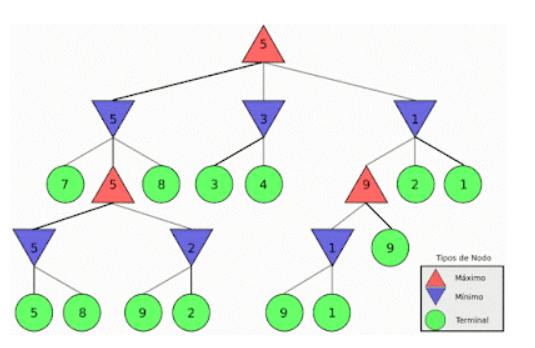

#### EL ALGORITMO ALFA-BETA

Se basa en una mejor del algoritmo anteriormente descrito, su mejora radica en que es posible poder calcular el estado objetivo sin la necesidad de recorrer todos los nodos del árbol, al igual que el anterior algoritmo hace el uso de la búsqueda en profundidad.

#### Caracteristicas

   1. Posibilita realizar búsquedas más profundas.
   2. El orden es muy importante
   
 Algo importante a recordar que los valores de Max (Alfa) son los del límite inferior y los de Min (Beta) son los limites superiores. Esto quiere decir que en los niveles maximizantes solo Beta puede podar y en los niveles minimizantes solo alfa puede podar.

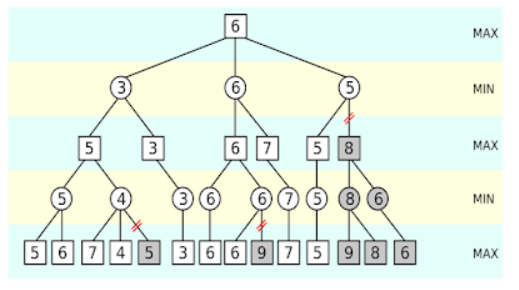

#### Funcionamiento del Algoritmo

El algoritmo primero generar un árbol de soluciones completo a partir de un nodo dado.

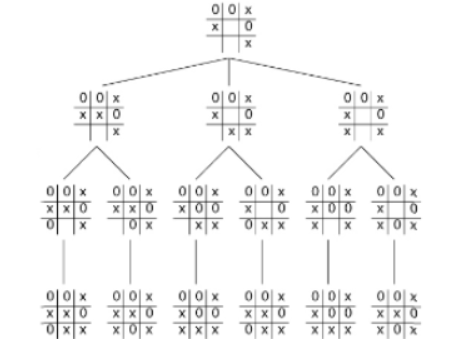

Para cada nodo final, buscamos la función de utilidad de estos. En nuestro ejemplo usaremos un 0 para las partidas que terminen en empate, un 1 para las que gane la IA y un -1 para las que gane el jugador humano.

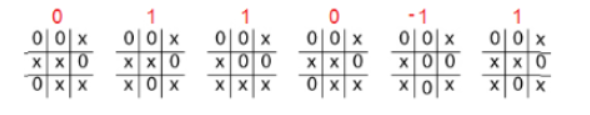

Y lo que hará el algoritmo Minimax cuando vaya regresando hacia atrás, será comunicarle a la llamada recursiva superior cuál es el mejor nodo hoja alcanzado hasta el momento. Cada llamada recursiva tiene que saber a quién le toca jugar, para analizar si el movimiento realizado pertenece a la IA o al otro jugador, ya que cuando sea el turno de la IA nos interesa MAXIMIZAR el resultado, y cuando sea el turno del rival MINIMIZAR su resultado.

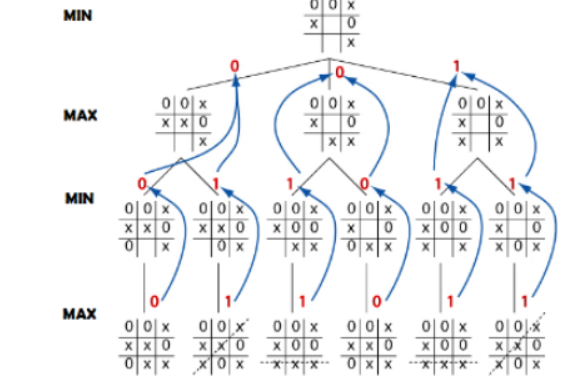

Al final el algoritmo nos devolverá la jugada que debe realizar la máquina para maximizar sus posibilidades y bloquear las posibilidades del rival.

### Desarrollar un mini-juego empleando 
1. easyAI
2. Universe + GYM

In [2]:
from tkinter import *
from tkinter import ttk
from tkinter import messagebox
import tkinter
import random
import pygame, time

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:

#colores
blanco = (255,255,255)
rojo = (200,0,0)
rojo_tomate = (255,51,0)
verde = (0,204,0)
verde_lima = (0,255,0)
azul = (0,51,255)
azul_marino = (0,0,119)
gris = (150,150,150)
gris_claro = (204,204,204)

tema = 0 #numero 0-4
color_fondo1 = [blanco, rojo, verde, azul, gris][tema]
color_fondo2 = [gris_claro, rojo_tomate, verde_lima, azul_marino, gris_claro][tema]

#variables ventana
t_casilla = 200
t_letra = 128
resolucion = (t_casilla * 3, t_casilla * 3)
FPS = 30

pygame.init()
clock = pygame.time.Clock()

#imagenes
img = {"X" : pygame.transform.smoothscale(pygame.image.load("x.png"), (t_letra, t_letra)),
       "O" : pygame.transform.smoothscale(pygame.image.load("o.png"), (t_letra, t_letra))}

#variables juego
VACIO = " "
JUGADOR = "X"
MAQUINA = "O"
dificultad = 5
contador = ""
filas_ganadoras = ((0, 1, 2), (3, 4, 5), (6, 7, 8),
                   (0, 3, 6), (1, 4, 7), (2, 5, 8),
                   (0, 4, 8), (2, 4, 6))

#funciones juego
colisionan = lambda punto, pos, dimensiones: pos[0] <= punto[0] <= pos[0] + dimensiones[0] and pos[1] <= punto[1] <= pos[1] + dimensiones[1]

def render_tablero(screen, tablero):
    
    #pintar fondo
    a = False
    for i in range(0, t_casilla * 3, t_casilla):
        for j in range(0, t_casilla * 3, t_casilla):
            a = a == False
            if a: pygame.draw.rect(screen, color_fondo1, ((i, j), (t_casilla, t_casilla)))
            else: pygame.draw.rect(screen, color_fondo2, ((i, j), (t_casilla, t_casilla)))
    #poner Os y Xs
    for a in range(9):
        if tablero[a] == " ": continue
        screen.blit(img[tablero[a]], (a % 3 * t_casilla + (t_casilla - t_letra) / 2, a // 3 * t_casilla + (t_casilla - t_letra) / 2))
       
def minimax(tablero, turno_player, profundidad = 5):
    
    if ganador(tablero) == MAQUINA: return (+10 - profundidad, None) #gana pc
    elif ganador(tablero) == JUGADOR: return (-10 - profundidad, None) #pierde pc
    elif VACIO not in tablero or profundidad < 1: return (0, None) #empatan
    elif turno_player: #turno de jugador
        best = (+11, None)
        for a in range(9):
            if tablero[a] == " ":
                valor = minimax(tablero[:a] + JUGADOR + tablero[a + 1:], not turno_player, profundidad - 1)[0]
                if valor < best[0]: best = (valor, a) #jugador intenta causar el MENOR beneficio a pc
        return best
    else: #turno de pc
        best = (-11, None)
        for a in range(9):
            if tablero[a] == " ":
                valor = minimax(tablero[:a] + MAQUINA + tablero[a + 1:], not turno_player, profundidad - 1)[0]
                if valor > best[0]: best = (valor, a) #pc intenta causar el MAYOR beneficio a si mismo
        return best
   
def ganador(tablero):
    
    for fila in filas_ganadoras:
        if tablero[fila[0]] == VACIO: continue
        if len(set(tablero[casilla] for casilla in fila)) == 1: return tablero[fila[0]]
    return False
       
def movimiento_pc(tablero):
    
    pygame.mouse.set_cursor(*pygame.cursors.broken_x)
    t0 = time.time() #inicio cronometro
    if tablero[4] == VACIO: a = 4 #cuando el centro esta vacio siempre trata de ocuparlo
    elif dificultad < 1:
        a = set(i for i in range(9) if tablero[i] == VACIO).pop() #uno aleatorio entre los movimientos validos
    elif dificultad >= 1:
        a = minimax(tablero, False, dificultad)[1] #algoritmo minimax limitado segun la dificultad
       
    if a is not None: tablero = tablero[:a] + MAQUINA + tablero[a + 1:] #sustituye la posicion a en el tablero por su letra
    print( "La maquina ha tardado {:.5f} ms".format((time.time() - t0) * 1000)) #tiempo desde inicio del cronometro
    pygame.mouse.set_cursor(*pygame.cursors.arrow)
    return tablero

screen = pygame.display.set_mode(resolucion)
pygame.display.set_caption("3 en raya")

def main():
    global contador
    #variables que se han de resetear al iniciar la partida
    turno_player = True
    tablero = VACIO * 9
    salir = False
    while not salir:
        clock.tick(FPS) #limitar los FPS para no consumir recursos innecesarios
       
        if not turno_player and not ganador(tablero) and VACIO in tablero:
            tablero = movimiento_pc(tablero)
            turno_player = True
   
        for event in pygame.event.get():
            if event.type == pygame.QUIT: #click en la cruz roja
                raise SystemExit
               
            elif event.type == pygame.KEYDOWN:
                if event.key == pygame.K_ESCAPE:
                    raise SystemExit
                   
            elif event.type == pygame.MOUSEBUTTONDOWN:
                if event.button == 1:
                    if ganador(tablero) or not VACIO in tablero: salir = True #Cuando la partida termina, se espera a clickar para reiniciarla
                    x = event.pos[0] // t_casilla + 3 * (event.pos[1] // t_casilla)
                    if tablero[x] == " ":
                        tablero = tablero[:x] + JUGADOR + tablero[x + 1:]
                        turno_player = False
       
        render_tablero(screen, tablero)
        pygame.display.flip()
       
    if ganador(tablero):
        contador = contador + ganador(tablero)
        print("\n" * 100)
        print(ganador(tablero), "ha ganado!    TOTAL: ", "X", str(contador.count("X")) + "-" + str(contador.count("O")), "O")
        print("\n")
        salir = True
    elif VACIO not in tablero:
        print("\n" * 100)
        print("EMPATE!!    TOTAL: ", "X", str(contador.count("X")) + "-" + str(contador.count("O")), "O")
        print("\n")
        salir = True
       
while True: main()
raise SystemExit

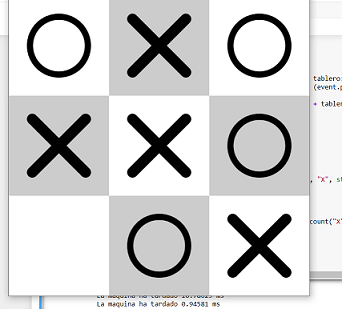